# ML - Linear regression - Assignment 1

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data using pandas and making a dataframe.

In [2]:
df = pd.read_csv(r"C:\Users\Pradyumn Sharma\Desktop\MACHINE LEARNING ASSIGNMENT\ASSIGNMENT 1\database.csv")

In [3]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


#### Checking the data information (meta)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

## Seperating the Dependent and independent variables

In [6]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
x

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [8]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64

### To prepare the data for least square method, we need to add a column with '1' value

In [9]:
x.insert(0,'one',1)

In [10]:
x

,one,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,1,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,1,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...,...
1025,1,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,1,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,1,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,1,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


## Split data for training and testing

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [13]:
x_train

,one,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
703,1,200.0,133.0,0.0,192.0,0.0,965.4,806.2,28
475,1,446.0,24.0,79.0,162.0,11.6,967.0,712.0,3
451,1,167.0,75.4,167.0,164.0,7.9,1007.3,770.1,56
1022,1,264.5,111.0,86.5,195.5,5.9,832.6,790.4,28
115,1,337.9,189.0,0.0,174.9,9.5,944.7,755.8,7
...,...,...,...,...,...,...,...,...,...
684,1,192.0,288.0,0.0,192.0,0.0,929.8,716.1,90
547,1,333.0,0.0,0.0,192.0,0.0,931.2,842.6,7
632,1,325.0,0.0,0.0,184.0,0.0,1063.0,783.0,28
717,1,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3


## Linear regression using least square method Y=b0.x+E and Q=[x^Tx].[x^T.Y]


In [14]:
x_t = np.transpose(x_train)

In [15]:
x_sqr = np.dot(x_t,x_train)

In [16]:
xt_y = np.dot(x_t,y_train)

In [17]:
xsqr_inv = np.linalg.inv(x_sqr)

In [18]:
para = np.dot(xsqr_inv,xt_y)

In [19]:
para

array([-1.67685330e+01,  1.28765986e-01,  1.09939214e-01,  1.00751921e-01,
       -1.74391363e-01,  1.18042350e-01,  1.56318302e-02,  1.79104160e-02,
        1.09242833e-01])

#### Predicting the target values using the trained model

In [20]:
y_pred = np.dot(x_test,para)

In [21]:
y_pred

array([32.04920768,  9.74176413, 32.26745522, 35.45930062, 16.32998963,
       35.84308717, 23.11130919, 40.38575048, 34.78132739, 33.25087883,
       34.39118236, 43.12750832, 47.716899  , 25.51249283, 34.25871279,
       20.27205589, 43.40651695, 23.97983241, 54.79000775, 36.65026791,
       39.62014307, 29.48563922, 18.86281793, 32.05181405, 54.9564869 ,
       34.61911204, 43.77974875, 26.15574349, 31.11198845, 22.7800095 ,
       57.83933861, 36.09188225, 57.38522812, 13.72128055, 32.35196564,
       31.87502191, 29.53336105, 16.11469891, 31.16898226, 36.94332031,
       31.5625257 , 43.85643113, 53.94074438, 45.39085868, 22.49736644,
       17.5832222 , 22.76161832, 21.97541279, 61.55786067, 49.58286935,
       37.99484912, 63.97148436, 55.30392538, 25.38644378, 29.7577676 ,
       50.55473492, 40.38899995, 29.97464275, 33.55980791, 30.71706615,
       12.30004476, 29.11176514, 55.0059625 , 22.8338314 , 37.69331387,
       41.62880988, 51.05567341, 19.15412459, 31.1424066 , 25.88

### Checking the R2 Score

In [22]:
from sklearn.metrics import r2_score

In [23]:
score = r2_score(y_test,y_pred)

In [24]:
score

0.5677301346161898

## Linear regression using gradient descent method

### Standardizing the dependent variable dataset

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
scaler

StandardScaler()

In [27]:
scaler.fit_transform(x_train)
scaler.fit_transform(x_test)

array([[ 0.        , -1.14846907,  0.06781338, ...,  0.39461161,
        -0.00996551, -0.68236225],
       [ 0.        , -1.73626733,  1.06815743, ..., -0.53783797,
         1.01865465, -0.68236225],
       [ 0.        , -1.15748131, -0.79915147, ...,  1.08686434,
         0.1204046 ,  0.86261764],
       ...,
       [ 0.        ,  0.51378837, -0.59793284, ...,  0.24212709,
        -1.54963649, -0.28417156],
       [ 0.        ,  1.64532506, -0.52319449, ..., -0.14920486,
        -0.76741584, -0.28417156],
       [ 0.        ,  1.05452272, -0.56918732, ..., -0.54053681,
         0.96650661, -0.28417156]])

### Defining the Batch Gradient Descent function

In [28]:
coef = np.ones(9)

In [29]:
def grad_desc(x,y,al,epoch):
    m = y.size
    theta = [1,1,1,1,1,1,1,1,1]
    h = np.dot(x,theta)
    cost = np.ones(epoch)

    for i in range(epoch):
        theta[0] = theta[0] - al*(1/m)*sum(h-y)
        for j in range(1,9):
            slope = (al*(1/m)*np.dot((h - y),np.transpose(x.iloc[:,j])))
            theta[j] = theta[j] - slope
        h = np.dot(x,theta)
        cost[i] = 1/(2*m)*sum(np.square(h-y))
        if abs(slope) < 0.00000001:
            break         
    return theta,cost

In [30]:
coef, j = grad_desc(x_train,y_train,0.000001,40000)

In [31]:
coef

[0.9962863851414038,
 0.10906041514068966,
 0.08607754741666496,
 0.06464442405720786,
 -0.14249839835359723,
 0.609620786009009,
 0.012039969485412834,
 0.00012255673257082278,
 0.10712660638347599]

Checking the predicted values of the model

In [32]:
gd_prd = np.dot(x_test, coef)
gd_prd1 = np.dot(x_train, coef)

In [33]:
test_score = r2_score(y_test,gd_prd)
train_score= r2_score(y_train,gd_prd1)

In [34]:
print(test_score)
print(train_score)

0.583764962679531
0.6146870690708373


In [35]:
# using stochastic gradient descent


### Mini gradient descent

In [36]:
def mini_grad_desc(x,y,al,epoch):
    m = y.size
    theta = [1,1,1,1,1,1,1,1,1]
    cost = np.ones(epoch)
    k = 10
    
    si = m//k
    for l in range(1,k):
        x_mini, y_mini = x.iloc[l*si:(l+1)*si,:],y.iloc[l*si:(l+1)*si]
        h = np.dot(x_mini,theta)
        
        for i in range(epoch):
            theta[0] = theta[0] - al*(1/si)*sum(h-y_mini)
            for j in range(1,9):
                slope = (al*(1/si)*np.dot((h - y_mini),np.transpose(x_mini.iloc[:,j])))
                theta[j] = theta[j] - slope
            h = np.dot(x_mini,theta)
            cost[i] = 1/(2*si)*sum(np.square(h-y_mini))
            if abs(slope) < 0.00000001:
                return theta,cost
    return theta,cost

In [37]:
coef, j = mini_grad_desc(x_train,y_train,0.000001,40000)

In [38]:
coef

[0.9968213578554259,
 0.08101756472583278,
 0.05502304613540613,
 -0.008407788825583159,
 -0.04550310967907829,
 0.9360976984973036,
 0.0210643149782599,
 -0.023647777246886253,
 0.20659290344759387]

In [39]:
gd_prd = np.dot(x_test, coef)
gd_prd1 = np.dot(x_train, coef)
score = r2_score(y_test,gd_prd)
score1= r2_score(y_train,gd_prd1)
print(score)
print(score1)

0.3843559504422537
0.35238641099494783


## Checking for the Assumptions

#### Relationship between Real Data & Predicted Data

Text(0, 0.5, 'Test predicted data')

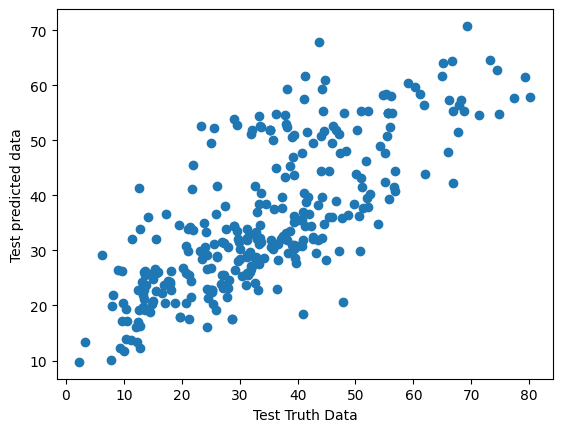

In [40]:
plt.scatter(y_test,y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test predicted data")

#### Calculating the residuals

In [41]:
residuals = y_test - y_pred

In [42]:
residuals

412   -16.529208
688    -7.411764
223     1.272545
311     4.480699
641    -3.599990
         ...    
761    -0.485945
591     1.927317
392    -0.472334
472   -10.883925
486    -5.170471
Name: Concrete compressive strength(MPa, megapascals) , Length: 309, dtype: float64

#### Checking the distribution of the residuals

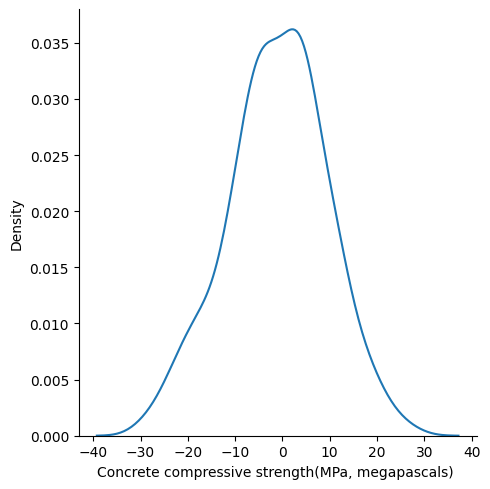

In [43]:
sns.displot(residuals, kind = 'kde')

##### Observation - it is close the normal distribution but with slightly more peakedness

### Homoscedacity - Scatter plot with predicted and residuals

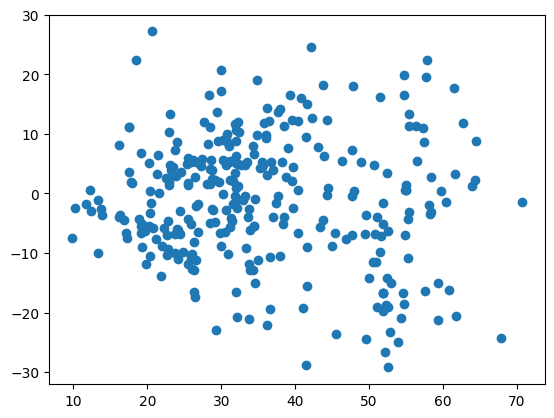

In [44]:
plt.scatter(y_pred,residuals)

#### Obseravtion - The spread seems to be less uniformly distributed 